In [1]:
import matplotlib.pyplot as plt

from datetime import date, time, datetime

import tensorflow as tf

import numpy as np

import pandas as pd

import seaborn as sns

low_memory = False

In [2]:
p18 = '/mnt/Sparetrack/weather_forecast_old/new_database/years/2018.csv'
p19 = '/mnt/Sparetrack/weather_forecast_old/new_database/years/2019.csv'
p20_21 = '/mnt/Sparetrack/weather/data/weather_2020_2021.csv'
path_final = "../pre_processed18_abril21.csv"

In [3]:
weather18 = pd.read_csv(p18,  low_memory = False, encoding = "ISO-8859-1")
weather19 = pd.read_csv(p19,  low_memory = False, encoding = "ISO-8859-1")
weather21 = pd.read_csv(p20_21,  low_memory = False, encoding = "ISO-8859-1")

/mnt/Sparetrack/weather/weather/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (2,6,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/mnt/Sparetrack/weather/weather/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
weather18.dtypes

DATA (YYYY-MM-DD)                                        object
HORA (UTC)                                               object
PRECIPITACAO TOTAL - HORARIO (mm)                        object
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    object
PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          object
PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         object
RADIACAO GLOBAL (KJ/m*m)                                 object
TEMPERATURA DO AR - BULBO SECO, HORARIA (Celsius)        object
TEMPERATURA DO PONTO DE ORVALHO (Celsius)                object
TEMPERATURA MAXIMA NA HORA ANT. (AUT) (Celsius)          object
TEMPERATURA MINIMA NA HORA ANT. (AUT) (Celsius)          object
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (Celsius)    object
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (Celsius)    object
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                  int64
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                  int64
UMIDADE RELATIVA DO AR, HORARIA (%)     

In [54]:
def city_brasilia( db ):
    cd = db.to_numpy()
    list1 = []

    for i in range(len(db)):
        if cd[i, 21] == 'BRASILIA':
            list1.append(cd[i])
    
    del db, cd

    return pd.DataFrame(list1, columns = ['DATA' , 'HORA_UTC',
                                'PRECIPITACAO_TOTAL_HORARIO_mm', 
                                'PRESSAO_ATMOSFERICA_NIVEL_DA_ESTACAO_HORARIA_mB',
                                'PRESSAO_ATMOSFERICA_MAX_NA_HORA_ANT_AUT_mB',
                                'PRESSAO_ATMOSFERICA_MIN_NA_HORA_ANT_AUT_mB', 
                                'RADIACAO_GLOBAL', 
                                'TEMPERATURA_DO_AR_BULBO_SECO_HORARIA',
                                'TEMPERATURA_PONTO_DE_ORVALHO', 
                                'TEMPERATURA_MAX_NA_HORA_ANT_AUT',
                                'TEMPERATURA_MIN_NA_HORA_ANT_AUT',
                                'TEMPERATURA_ORVALHO_MAX_NA_HORA_ANT_AUT',
                                'TEMPERATURA_ORVALHO_MIN_NA_HORA_ANT_AUT',
                                'UMIDADE_REL_MAX_NA_HORA_ANT_AUT_porcent', 
                                'UMIDADE_REL_MIN_NA_HORA_ANT_AUT_porcent', 
                                'UMIDADE_RELATIVA_DO_AR_HORARIA_porcent',
                                'VENTO_DIRECAO_HORARIA', 
                                'VENTO_RAJADA_MAX',
                                'VENTO_VELOCIDADE_HORARIA',   
                                'REGIAO', 'UF', 'ESTACAO', 'CODIGO_WMO',
                                'LATITUDE', 'LONGITUDE', 'ALTITUDE', 
                                'DATA_FUNDACAO'], index = None)

In [6]:
def rename_columns_df(df):
    dd = df.to_numpy()
    del df
    dd = pd.DataFrame(dd, columns = ['DATA', 'HORA_UTC', 
                            'PRECIPITACAO_TOTAL_HORARIO_mm', 
                            'PRESSAO_ATMOSFERICA_NIVEL_DA_ESTACAO_HORARIA_mB',
                            'PRESSAO_ATMOSFERICA_MAX_NA_HORA_ANT_AUT_mB',
                            'PRESSAO_ATMOSFERICA_MIN_NA_HORA_ANT_AUT_mB', 
                            'RADIACAO_GLOBAL', 
                            'TEMPERATURA_DO_AR_BULBO_SECO_HORARIA',
                            'TEMPERATURA_PONTO_DE_ORVALHO', 
                            'TEMPERATURA_MAX_NA_HORA_ANT_AUT',
                            'TEMPERATURA_MIN_NA_HORA_ANT_AUT',
                            'TEMPERATURA_ORVALHO_MAX_NA_HORA_ANT_AUT',
                            'TEMPERATURA_ORVALHO_MIN_NA_HORA_ANT_AUT',
                            'UMIDADE_REL_MAX_NA_HORA_ANT_AUT_porcent', 
                            'UMIDADE_REL_MIN_NA_HORA_ANT_AUT_porcent', 
                            'UMIDADE_RELATIVA_DO_AR_HORARIA_porcent',
                            'VENTO_DIRECAO_HORARIA', 
                            'VENTO_RAJADA_MAX',
                            'VENTO_VELOCIDADE_HORARIA',   
                            'REGIAO', 'UF', 'ESTACAO', 'CODIGO_WMO',
                            'LATITUDE', 'LONGITUDE', 'ALTITUDE', 
                            'DATA_FUNDACAO'], index = None)

    return dd

In [17]:
def fix_erros( d ):
    db = d.replace(",", ".", regex = True) # quero que substitua todas as ',' por '.', mas tem que haver numero depois da ','
    #db = db0.replace("-9999", 0, regex = True)

    return db

In [8]:
def fix_types( db ):
    db['DATA'] = db['DATA'].astype(str)
    db['HORA_UTC'] = db['HORA_UTC'].astype(str)
    db['PRECIPITACAO_TOTAL_HORARIO_mm'] = db['PRECIPITACAO_TOTAL_HORARIO_mm'].astype(float)
    db['PRESSAO_ATMOSFERICA_NIVEL_DA_ESTACAO_HORARIA_mB'] = db['PRESSAO_ATMOSFERICA_NIVEL_DA_ESTACAO_HORARIA_mB'].astype(float)
    db['PRESSAO_ATMOSFERICA_MAX_NA_HORA_ANT_AUT_mB'] = db['PRESSAO_ATMOSFERICA_MAX_NA_HORA_ANT_AUT_mB'].astype(float)
    db['PRESSAO_ATMOSFERICA_MIN_NA_HORA_ANT_AUT_mB'] = db['PRESSAO_ATMOSFERICA_MIN_NA_HORA_ANT_AUT_mB'].astype(float)
    db['RADIACAO_GLOBAL'] = db['RADIACAO_GLOBAL'].astype(float)
    db['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA'] = db['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA'].astype(float)
    db['TEMPERATURA_PONTO_DE_ORVALHO'] = db['TEMPERATURA_PONTO_DE_ORVALHO'].astype(float)
    db['TEMPERATURA_MAX_NA_HORA_ANT_AUT'] = db['TEMPERATURA_MAX_NA_HORA_ANT_AUT'].astype(float)
    db['TEMPERATURA_MAX_NA_HORA_ANT_AUT'] = db['TEMPERATURA_MAX_NA_HORA_ANT_AUT'].astype(float)
    db['TEMPERATURA_MIN_NA_HORA_ANT_AUT'] = db['TEMPERATURA_MIN_NA_HORA_ANT_AUT'].astype(float)
    db['TEMPERATURA_ORVALHO_MAX_NA_HORA_ANT_AUT'] = db['TEMPERATURA_ORVALHO_MAX_NA_HORA_ANT_AUT'].astype(float)
    db['TEMPERATURA_ORVALHO_MIN_NA_HORA_ANT_AUT'] = db['TEMPERATURA_ORVALHO_MIN_NA_HORA_ANT_AUT'].astype(float)
    db['UMIDADE_REL_MAX_NA_HORA_ANT_AUT_porcent'] = db['UMIDADE_REL_MAX_NA_HORA_ANT_AUT_porcent'].astype(float)
    db['UMIDADE_REL_MIN_NA_HORA_ANT_AUT_porcent'] = db['UMIDADE_REL_MIN_NA_HORA_ANT_AUT_porcent'].astype(float)
    db['UMIDADE_RELATIVA_DO_AR_HORARIA_porcent'] = db['UMIDADE_RELATIVA_DO_AR_HORARIA_porcent'].astype(float)
    db['VENTO_DIRECAO_HORARIA'] = db['VENTO_DIRECAO_HORARIA'].astype(float)
    db['VENTO_RAJADA_MAX'] = db['VENTO_RAJADA_MAX'].astype(float)
    db['VENTO_VELOCIDADE_HORARIA'] = db['VENTO_VELOCIDADE_HORARIA'].astype(float)
    db['REGIAO'] = db['REGIAO'].astype(str)
    db['ESTACAO'] = db['ESTACAO'].astype(str)
    db['CODIGO_WMO'] = db['CODIGO_WMO'].astype(str)
    db['LATITUDE'] = db['LATITUDE'].astype(str)
    db['LONGITUDE'] = db['LONGITUDE'].astype(str)
    db['ALTITUDE'] = db['ALTITUDE'].astype(str)
    db['DATA_FUNDACAO'] = db['DATA_FUNDACAO'].astype(str)

    return db

In [9]:
columns_with_numeric_type = ['PRECIPITACAO_TOTAL_HORARIO_mm', 
                            'PRESSAO_ATMOSFERICA_NIVEL_DA_ESTACAO_HORARIA_mB',
                            'PRESSAO_ATMOSFERICA_MAX_NA_HORA_ANT_AUT_mB',
                            'PRESSAO_ATMOSFERICA_MIN_NA_HORA_ANT_AUT_mB', 
                            'RADIACAO_GLOBAL', 
                            'TEMPERATURA_DO_AR_BULBO_SECO_HORARIA',
                            'TEMPERATURA_PONTO_DE_ORVALHO', 
                            'TEMPERATURA_MAX_NA_HORA_ANT_AUT',
                            'TEMPERATURA_MIN_NA_HORA_ANT_AUT',
                            'TEMPERATURA_ORVALHO_MAX_NA_HORA_ANT_AUT',
                            'TEMPERATURA_ORVALHO_MIN_NA_HORA_ANT_AUT',
                            'UMIDADE_REL_MAX_NA_HORA_ANT_AUT_porcent', 
                            'UMIDADE_REL_MIN_NA_HORA_ANT_AUT_porcent', 
                            'UMIDADE_RELATIVA_DO_AR_HORARIA_porcent',
                            'VENTO_DIRECAO_HORARIA', 
                            'VENTO_RAJADA_MAX',
                            'VENTO_VELOCIDADE_HORARIA']

In [55]:
def fillna_with_mean(series):
    try:
        s0 = series.dropna()
        s1 = s0.replace(-9999.0, 0, regex = True)

        del s0

        m = s1.mean()

        del s1
        
        series = series.replace(-9999.0, m, regex = True)

        try:
            s = series.fillna(m)
            return s
                
        except ValueError:
            raise ValueError ("Falha em substituir nan por média!")
    
    except:
        print("Falha calcular média!")

In [50]:
def process_fillna(columns_with_numeric_type, data):
    new_data = data.copy()
    for column in columns_with_numeric_type:
        serie = fillna_with_mean(new_data[column])
        assert serie.isna().sum() == 0

        new_data = new_data.drop([column], axis = 1)
        serie = pd.DataFrame(serie, columns = [column])
        new_data = pd.concat([new_data, serie], axis = 1)
        
    del data
        
    return new_data

In [12]:
def reorder_columns(db):
    db = db[['DATA', 'HORA_UTC', 'PRECIPITACAO_TOTAL_HORARIO_mm', 
                    'PRESSAO_ATMOSFERICA_NIVEL_DA_ESTACAO_HORARIA_mB',
                    'PRESSAO_ATMOSFERICA_MAX_NA_HORA_ANT_AUT_mB',
                    'PRESSAO_ATMOSFERICA_MIN_NA_HORA_ANT_AUT_mB', 
                    'RADIACAO_GLOBAL', 
                    'TEMPERATURA_DO_AR_BULBO_SECO_HORARIA',
                    'TEMPERATURA_PONTO_DE_ORVALHO', 
                    'TEMPERATURA_MAX_NA_HORA_ANT_AUT',
                    'TEMPERATURA_MIN_NA_HORA_ANT_AUT',
                    'TEMPERATURA_ORVALHO_MAX_NA_HORA_ANT_AUT',
                    'TEMPERATURA_ORVALHO_MIN_NA_HORA_ANT_AUT',
                    'UMIDADE_REL_MAX_NA_HORA_ANT_AUT_porcent', 
                    'UMIDADE_REL_MIN_NA_HORA_ANT_AUT_porcent', 
                    'UMIDADE_RELATIVA_DO_AR_HORARIA_porcent',
                    'VENTO_DIRECAO_HORARIA', 
                    'VENTO_RAJADA_MAX',
                    'VENTO_VELOCIDADE_HORARIA',   
                    'REGIAO', 'UF', 'ESTACAO', 'CODIGO_WMO',
                    'LATITUDE', 'LONGITUDE', 'ALTITUDE', 
                    'DATA_FUNDACAO']]

    return db

In [13]:
def join_time(dates, hours):
    s0 = dates.to_numpy()
    s1 = hours.to_numpy()
    result = []

    for row in range(len(s0)):
        result.append(datetime.combine(s0[row], s1[row]))

    del dates, hours, s0, s1

    return pd.DataFrame(result, columns= ['TIMESTAMP'], index= None)

In [58]:
def fix_time( db ):
    db['HORA_UTC'] = db['HORA_UTC'].map(lambda v: v[:2] + ':' + v[2:4])
    db['HORA_UTC'] = db['HORA_UTC'].map(lambda h: time(hour = int(h[:2]), minute = int(h[3:5])))
    db['DATA'] = db['DATA'].map(lambda d: date(int(d[:4]), int(d[5:7]), int(d[8:])))
    db['TIMESTAMP'] = join_time(db['DATA'], db['HORA_UTC'])
    db['TIMESTAMP'] = pd.to_datetime(db['TIMESTAMP'])
    db = db.drop(['DATA', 'HORA_UTC'], axis = 1)

    return db

In [57]:
weather18 = city_brasilia(weather18)
weather18 = rename_columns_df(weather18)
weather18 = fix_erros(weather18)
weather18 = fix_types(weather18)
weather18 = process_fillna(columns_with_numeric_type, weather18)
weather18 = reorder_columns(weather18)
weather18 = fix_time(weather18)


In [59]:
weather19 = city_brasilia(weather19)
weather19 = rename_columns_df(weather19)
weather19 = fix_erros(weather19)
weather19 = fix_types(weather19)
weather19 = process_fillna(columns_with_numeric_type, weather19)
weather19 = reorder_columns(weather19)
weather19 = fix_time(weather19)

In [60]:
weather21 = city_brasilia(weather21)
weather21 = rename_columns_df(weather21)
weather21 = fix_erros(weather21)
weather21 = fix_types(weather21)
weather21 = process_fillna(columns_with_numeric_type, weather21)
weather21 = reorder_columns(weather21)
weather21 = fix_time(weather21)

In [61]:
weather21 = pd.concat([weather18, weather19, weather21], axis = 0)

In [63]:
del weather18, weather19

In [43]:
date_time = pd.to_datetime(weather21['TIMESTAMP'])

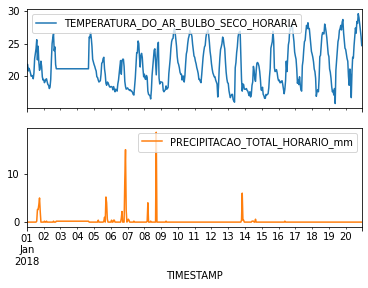

In [70]:
plot_cols = ['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA', 'PRECIPITACAO_TOTAL_HORARIO_mm']
plot_features = weather21[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots = True)

In [49]:
weather21.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PRECIPITACAO_TOTAL_HORARIO_mm,29148.0,0.195303,1.569164,0.0,0.0,0.000000,0.000,62.8
PRESSAO_ATMOSFERICA_NIVEL_DA_ESTACAO_HORARIA_mB,29148.0,886.105443,36.069171,0.0,885.9,887.400000,889.200,896.5
PRESSAO_ATMOSFERICA_MAX_NA_HORA_ANT_AUT_mB,29148.0,886.290979,36.816984,0.0,886.2,887.700000,889.400,896.6
PRESSAO_ATMOSFERICA_MIN_NA_HORA_ANT_AUT_mB,29148.0,885.798555,36.798897,0.0,885.6,887.200000,888.900,896.4
RADIACAO_GLOBAL,29148.0,1278.828959,969.871662,0.0,277.7,1470.306515,1535.525,4324.8
TEMPERATURA_DO_AR_BULBO_SECO_HORARIA,29148.0,21.473794,3.930179,0.0,18.9,20.900000,24.200,35.5
TEMPERATURA_PONTO_DE_ORVALHO,29148.0,14.051174,4.227189,-2.7,11.1,15.400000,17.500,21.0
TEMPERATURA_MAX_NA_HORA_ANT_AUT,29148.0,22.191835,4.046952,0.0,19.3,21.700000,25.100,36.5
TEMPERATURA_MIN_NA_HORA_ANT_AUT,29148.0,20.788386,3.815112,0.0,18.4,20.300000,23.400,34.4
TEMPERATURA_ORVALHO_MAX_NA_HORA_ANT_AUT,29148.0,14.634458,4.178647,-2.0,11.7,16.100000,17.900,21.9


In [50]:
wind = weather21['VENTO_DIRECAO_HORARIA']
max_wind = weather21['VENTO_RAJADA_MAX']

In [51]:
bad_wind = wind == -9999.0
wind[bad_wind] = 0.0

bad_max_wind = max_wind == -9999.0
max_wind[bad_max_wind] = 0.0

/tmp/ipykernel_7924/3142063135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind[bad_wind] = 0.0
/tmp/ipykernel_7924/3142063135.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_wind[bad_max_wind] = 0.0


In [52]:
weather21['VENTO_DIRECAO_HORARIA'].min()

0.0

In [53]:
wind_dir = weather21['VENTO_DIRECAO_HORARIA'][:7500]
wind_vel = weather21['VENTO_VELOCIDADE_HORARIA'][:7500]

Text(0, 0.5, 'Velocidade do Vento (m/s)')

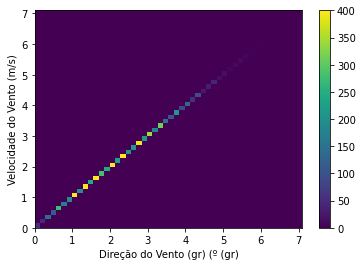

In [54]:
plt.hist2d(wind_vel, wind_vel, bins = (50, 50), vmax = 400)
plt.colorbar()
plt.xlabel('Direção do Vento (gr) (º (gr)')
plt.ylabel('Velocidade do Vento (m/s)')

In [55]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [57]:
day = 24*60*60
year = (365.2425) * day

weather21['DIA SENO'] = np.sin(timestamp_s * (2* np.pi / day))
weather21['DIA COS'] = np.cos(timestamp_s * (2* np.pi / day))

weather21['ANO SENO'] = np.sin(timestamp_s * (2* np.pi / year))
weather21['ANO COS'] = np.cos(timestamp_s * (2* np.pi / year))

Text(0, 0.5, 'Sinal da hora do dia')

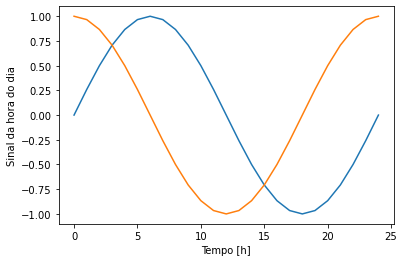

In [58]:
plt.plot(weather21['DIA SENO'][:25])
plt.plot(weather21['DIA COS'][:25])
plt.xlabel('Tempo [h]')
plt.ylabel('Sinal da hora do dia')

In [59]:
fft = tf.signal.rfft(weather21['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(weather21['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset

2021-08-17 16:33:01.083411: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-17 16:33:01.142052: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-17 16:33:01.142437: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.605GHz coreCount: 14 deviceMemorySize: 3.82GiB deviceMemoryBandwidth: 178.84GiB/s
2021-08-17 16:33:01.142478: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-08-17 16:33:01.180347: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-08-17 16:33:01.180490: I tensorflow/stream_executor/pla

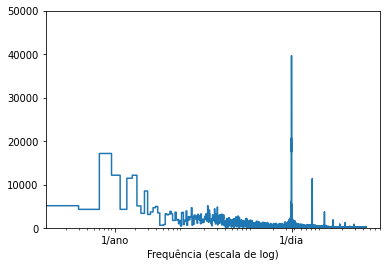

In [62]:
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 50000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels = ['1/ano', '1/dia'])
_ = plt.xlabel("Frequência (escala de log)")

In [63]:
weather21.to_csv(path_final, index = None)

In [64]:
weather21.shape

(29148, 30)